In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from functools import reduce
import random

In [3]:
snsC = {
    'font.size': 10.0,
    'axes.labelsize': 'medium',
    'axes.titlesize': 'large',
    'xtick.labelsize': 'medium',
    'ytick.labelsize': 'medium',
    'legend.fontsize': 'medium',
    'axes.linewidth': 0.8,
    'grid.linewidth': 0.8,
    'lines.linewidth': 1.5,
    'lines.markersize': 6.0,
    'patch.linewidth': 1.0,
    'xtick.major.width': 0.8,
    'ytick.major.width': 0.8,
    'xtick.minor.width': 0.6,
    'ytick.minor.width': 0.6,
    'xtick.major.size': 3.5,
    'ytick.major.size': 3.5,
    'xtick.minor.size': 2.0,
    'ytick.minor.size': 2.0,
    'legend.title_fontsize': None
}

In [4]:
train_df = pd.read_csv('../data/train_dataV2.csv')
val_df = pd.read_csv('../data/validation_dataV2.csv')

train_df.head()

,CategoryCode,ItemCode,DateID,DailySales,DOW,WOY,DOY
0,category_2,117610,2021-11-06,7,5,44,310
1,category_4,836584,2021-11-18,16,3,46,322
2,category_1,370195,2022-01-24,6,0,4,24
3,category_2,172582,2021-10-30,5,5,43,303
4,category_2,1006009,2021-10-30,5,5,43,303


In [5]:
I2C_map = pd.Series(train_df.CategoryCode.values,index=train_df.ItemCode).to_dict()

In [6]:
saleD = pd.read_csv('../data/DSalesPointsV2.csv')
saleD.head()

,ItemCode,DailySales,CategoryCode
0,3418,"[18, 3, 8, 2, 4, 2, 8, 12, 0, 14, 2, 9, 8, 5, ...",category_1
1,3427,"[2, 7, 2, 3, 9, 0, 5, 8, 10, 5, 5, 4, 0, 4, 3,...",category_1
2,7666,"[14, 58, 12, 8, 5, 33, 11, 23, 24, 15, 41, 20,...",category_1
3,9925,"[1, 3, 1, 2, 0, 0, 2, 1, 0, 1, 8, 0, 2, 0, 0, ...",category_1
4,16936,"[4, 1, 4, 1, 0, 0, 21, 2, 1, 0, 5, 9, 2, 8, 8,...",category_1


In [7]:
saleW = pd.read_csv('../data/WSalesPointsV2.csv')
saleW.head()

,Unnamed: 0,ItemCode,#sales,stage,WeeklySales
0,0,3418,20,validation,"[83, 85, 89, 67, 109, 72, 29, 42, 41, 41, 44, ..."
1,1,3427,20,validation,"[66, 32, 34, 29, 58, 35, 11, 40, 20, 48, 54, 2..."
2,2,7666,20,validation,"[15, 26, 28, 38, 41, 39, 84, 119, 196, 185, 94..."
3,3,9925,20,test,"[8, 9, 14, 10, 8, 21, 1, 9, 11, 13, 5, 11, 11,..."
4,4,16936,20,test,"[74, 66, 43, 66, 48, 71, 9, 25, 40, 31, 21, 43..."


In [8]:
n = 15
random.seed(435)
C2I = train_df.groupby('CategoryCode').agg(list).to_dict()['ItemCode']
rnd_items = reduce(lambda x,y: x+random.choices(y, k=n), C2I.values(), [] )
strf_df = train_df.loc[train_df['ItemCode'].isin(rnd_items), :]
strf_df['DateID'] = pd.to_datetime(strf_df['DateID'])
strf_df

C:\Users\thari\AppData\Local\Temp\ipykernel_64424\1991771274.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strf_df['DateID'] = pd.to_datetime(strf_df['DateID'])


,CategoryCode,ItemCode,DateID,DailySales,DOW,WOY,DOY
2,category_1,370195,2022-01-24,6,0,4,24
5,category_2,903976,2022-01-06,1,3,1,6
17,category_1,1050046,2021-10-30,3,5,43,303
18,category_1,1044610,2021-12-07,2,1,49,341
30,category_2,836125,2021-11-17,13,2,46,321
...,...,...,...,...,...,...,...
19890,category_2,75886,2021-10-01,2,4,39,274
19891,category_1,3427,2021-10-12,4,1,41,285
19897,category_3,1064572,2021-10-01,2,4,39,274
19905,category_2,50785,2021-10-01,3,4,39,274


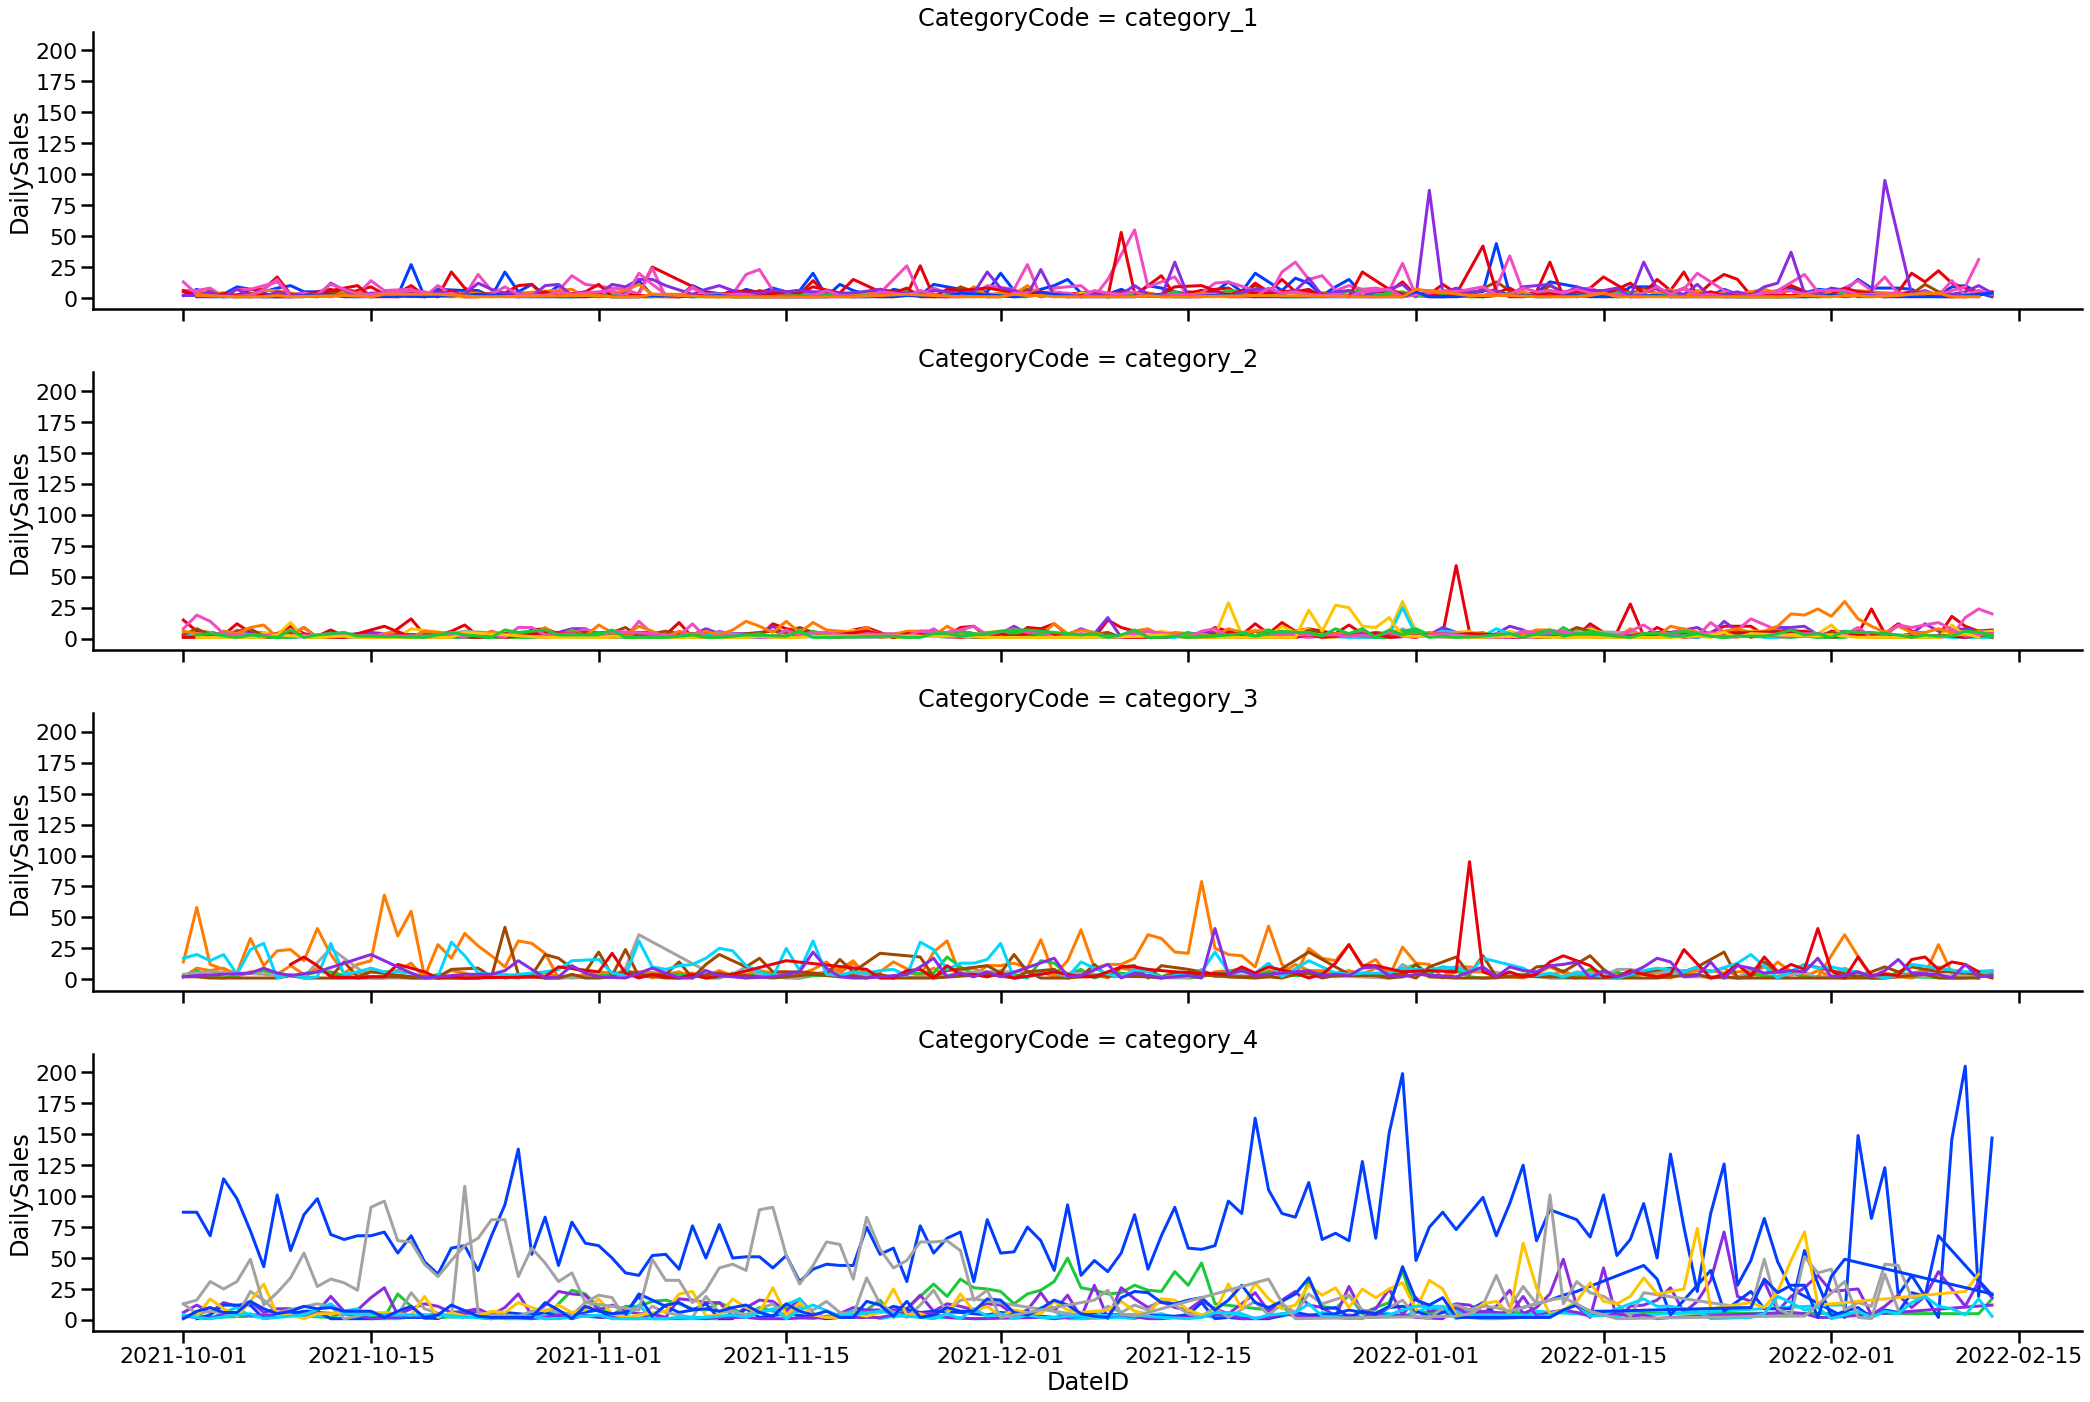

In [9]:

with sns.plotting_context("poster"):
    g = sns.relplot(x='DateID', y='DailySales', hue='ItemCode', row='CategoryCode', kind='line', data=strf_df, palette="bright", legend=False, row_order=['category_1', 'category_2', 'category_3', 'category_4'])
    g.fig.set_size_inches(60,20)
    # g.fig.suptitle("Daily sales over train period under 4 categories",fontsize=20)
# plt.setp(, fontsize='22') # for legend text
# g.set_xlabel("Category Code",fontsize=30)
# g.set_ylabel("Daily Sales",fontsize=20)

***

In [10]:
train_udf = pd.read_csv('../data/train_dataV3.csv')
train_udf.head()

,Unnamed: 0,ItemCode,Date,DailySales,CategoryCode
0,0,3418,2021-10-01,18,category_1
1,1,3418,2021-10-02,3,category_1
2,2,3418,2021-10-03,8,category_1
3,3,3418,2021-10-04,2,category_1
4,4,3418,2021-10-05,4,category_1


In [12]:
# train_df.copy().sort_values(by='DateID').groupby('WOY')['DateID'].first().dt.date.astype(str).to_dict()

In [14]:
itemC = 7666
train_df['DateID'] = pd.to_datetime(train_df['DateID'])
W2D_list = train_df.copy().sort_values(by='DateID').groupby('WOY')['DateID'].first().dt.date.astype(str).values
Date_list = train_udf.loc[train_udf['ItemCode']==itemC, 'Date'].astype(str).values


dSales = eval(saleD.loc[saleD['ItemCode']==itemC, 'DailySales'].values[0])
wSales = eval(saleW.loc[saleD['ItemCode']==itemC, 'WeeklySales'].values[0])
# .to_dict()

In [15]:
saleD.loc[saleD['ItemCode']==3418, 'DailySales'].values[0]

'[18, 3, 8, 2, 4, 2, 8, 12, 0, 14, 2, 9, 8, 5, 15, 2, 0, 14, 4, 12, 2, 1, 6, 2, 13, 5, 5, 6, 10, 2, 3, 8, 12, 8, 10, 7, 1, 0, 14, 3, 6, 7, 3, 5, 5, 7, 20, 10, 0, 12, 0, 0, 2, 10, 6, 17, 7, 5, 7, 6, 6, 13, 14, 9, 12, 9, 25, 11, 6, 16, 12, 20, 11, 12, 15, 4, 24, 3, 13, 2, 7, 19, 1, 16, 19, 9, 4, 6, 6, 10, 11, 6, 4, 13, 9, 26, 2, 20, 20, 3, 3, 7, 7, 14, 28, 8, 9, 12, 18, 0, 16, 12, 18, 8, 17, 15, 2, 3, 19, 7, 9, 12, 22, 7, 17, 29, 10, 11, 13, 6, 7, 26, 9, 2, 19, 3]'

In [16]:
print(len(Date_list), len(dSales))

135 135


In [17]:
print(len(wSales), len(W2D_list))

20 20


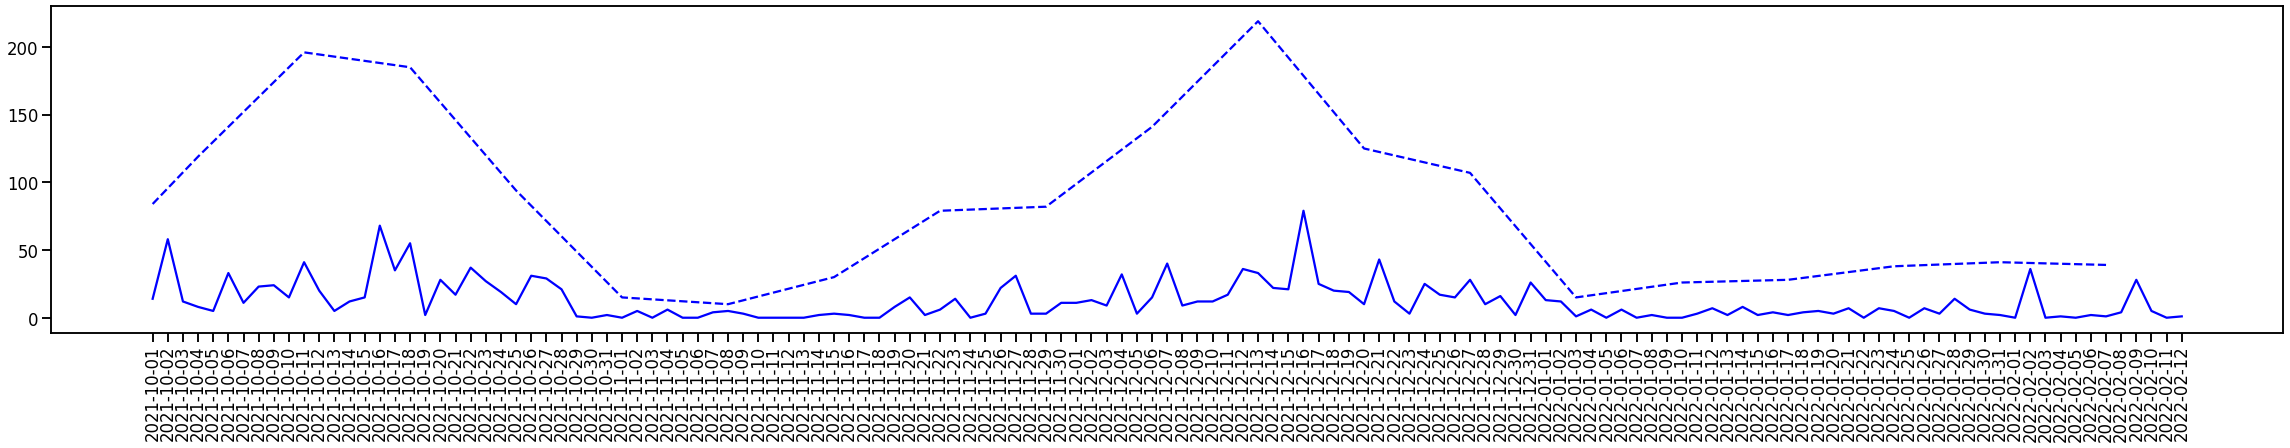

In [22]:
Cpalette={'Blue': '#0055BF', 'Red': '#C91A09', 'Yellow': '#F2CD37'}
plt.figure(figsize=(40, 6))
with sns.plotting_context("talk"):
    sns.lineplot(x=Date_list, y=dSales, dashes=False, color='blue', markers='o')
    g = sns.lineplot(x=W2D_list, y=wSales, linestyle="dashed", color='blue', markers='o')
    plt.setp(g.get_xticklabels(), rotation=90)

***

In [23]:
train_df.head()

,CategoryCode,ItemCode,DateID,DailySales,DOW,WOY,DOY
0,category_2,117610,2021-11-06,7,5,44,310
1,category_4,836584,2021-11-18,16,3,46,322
2,category_1,370195,2022-01-24,6,0,4,24
3,category_2,172582,2021-10-30,5,5,43,303
4,category_2,1006009,2021-10-30,5,5,43,303


In [24]:
train_df['M'] = train_df['DateID'].dt.month
train_df.head()

,CategoryCode,ItemCode,DateID,DailySales,DOW,WOY,DOY,M
0,category_2,117610,2021-11-06,7,5,44,310,11
1,category_4,836584,2021-11-18,16,3,46,322,11
2,category_1,370195,2022-01-24,6,0,4,24,1
3,category_2,172582,2021-10-30,5,5,43,303,10
4,category_2,1006009,2021-10-30,5,5,43,303,10


In [25]:
cum_df = train_df.copy().loc[: ,['CategoryCode', 'M', 'DailySales']].groupby(['CategoryCode', 'M'])['DailySales'].sum().reset_index()
cum_df.head()

,CategoryCode,M,DailySales
0,category_1,1,12839
1,category_1,2,5243
2,category_1,10,9337
3,category_1,11,10016
4,category_1,12,12093


In [26]:
cum_df.shape

(20, 3)

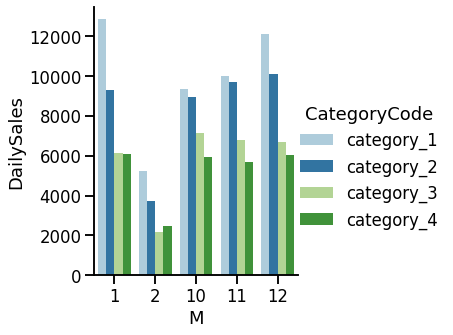

In [27]:
with sns.plotting_context("talk"):
    sns.catplot(x="M", y="DailySales", hue="CategoryCode", data=cum_df, kind="bar", palette="Paired")
# sns.histplot(data=cum_df, x="DailySales", hue="CategoryCode", multiple="stack")

***

In [28]:
pd.set_option('display.max_rows', None)

In [29]:
train_udf.head()

,Unnamed: 0,ItemCode,Date,DailySales,CategoryCode
0,0,3418,2021-10-01,18,category_1
1,1,3418,2021-10-02,3,category_1
2,2,3418,2021-10-03,8,category_1
3,3,3418,2021-10-04,2,category_1
4,4,3418,2021-10-05,4,category_1


In [30]:
# Import Data
Date_list = train_udf.loc[train_udf['ItemCode']==itemC, 'Date'].values
adf = pd.DataFrame({'sales': dSales, 'date': Date_list})
adf['date'] = pd.to_datetime(adf['date'])
adf.set_index('date', inplace=True)
adf.head()

,sales
date,
2021-10-01,14
2021-10-02,58
2021-10-03,12
2021-10-04,8
2021-10-05,5


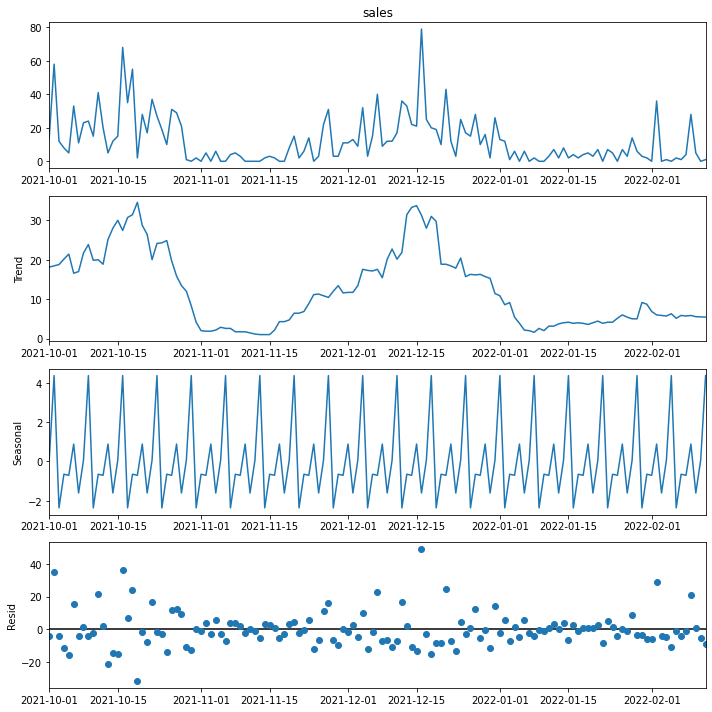

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from statsmodels.tsa.seasonal import STL

# pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
# print(df)

# Multiplicative Decomposition 
# result_mul = seasonal_decompose(df['sales'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(adf['sales'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
# result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('', fontsize=22)
plt.show()

In [35]:
! pip install statsmodels

  Using cached patsy-0.5.2-py2.py3-none-any.whl (233 kB)


In [37]:
wdf = pd.read_csv('../data/sample_train1.csv')
wdf.head()

FileNotFoundError: [Errno 2] No such file or directory: '../data/sample_train1.csv'

In [ ]:
woy_map = {i: n for i,n in enumerate(range(39, 53), 1)}
woy_map.update({i: n for i,n in enumerate(range(1, 7), 15)})
woy_map

{1: 39,
 2: 40,
 3: 41,
 4: 42,
 5: 43,
 6: 44,
 7: 45,
 8: 46,
 9: 47,
 10: 48,
 11: 49,
 12: 50,
 13: 51,
 14: 52,
 15: 1,
 16: 2,
 17: 3,
 18: 4,
 19: 5,
 20: 6}

In [ ]:
wdf['WoY'] = wdf['WoY'].map(woy_map)
wdf.head()

,Unnamed: 0,CategoryCode,ItemCode,WoY,WeeklySales
0,0,category_1,3418,1,83
1,1,category_1,3418,2,85
2,2,category_1,3418,3,89
3,3,category_1,3418,4,67
4,4,category_1,3418,5,109


In [ ]:
W2M_map = train_df.copy().sort_values(by='DateID').groupby('WOY')['DateID'].first().dt.date.astype(str).to_dict()

wdf['M'] = wdf['WoY'].map(W2M_map)
wdf.head()

,Unnamed: 0,CategoryCode,ItemCode,WoY,WeeklySales,M
0,0,category_1,3418,1,83,2022-01-03
1,1,category_1,3418,2,85,2022-01-10
2,2,category_1,3418,3,89,2022-01-17
3,3,category_1,3418,4,67,2022-01-24
4,4,category_1,3418,5,109,2022-01-31


In [ ]:
# Import Data
Date_list = wdf.loc[wdf['ItemCode']==itemC, 'M'].values
wSales = wdf.loc[wdf['ItemCode']==itemC, 'WeeklySales'].values
bdf = pd.DataFrame({'sales': wSales, 'date': Date_list}).sort_values(by='date')
bdf['date'] = pd.to_datetime(bdf['date'])
bdf.set_index('date', inplace=True)
bdf.head()

,sales
date,
2021-10-01,84
2021-10-04,119
2021-10-11,196
2021-10-18,185
2021-10-25,94


In [ ]:
bdf['sales'].index

DatetimeIndex(['2021-10-01', '2021-10-04', '2021-10-11', '2021-10-18',
               '2021-10-25', '2021-11-01', '2021-11-08', '2021-11-15',
               '2021-11-22', '2021-11-29', '2021-12-06', '2021-12-13',
               '2021-12-20', '2021-12-27', '2022-01-03', '2022-01-10',
               '2022-01-17', '2022-01-24', '2022-01-31', '2022-02-07'],
              dtype='datetime64[ns]', name='date', freq=None)

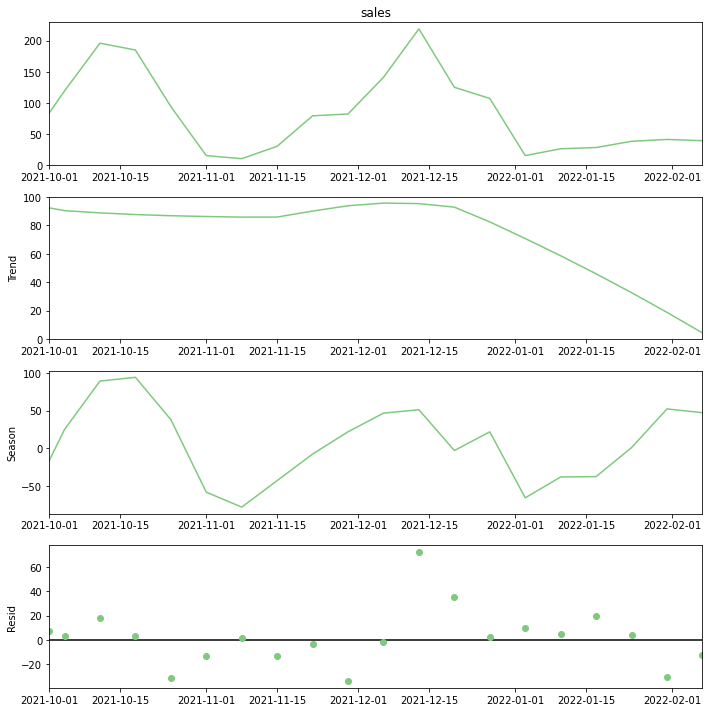

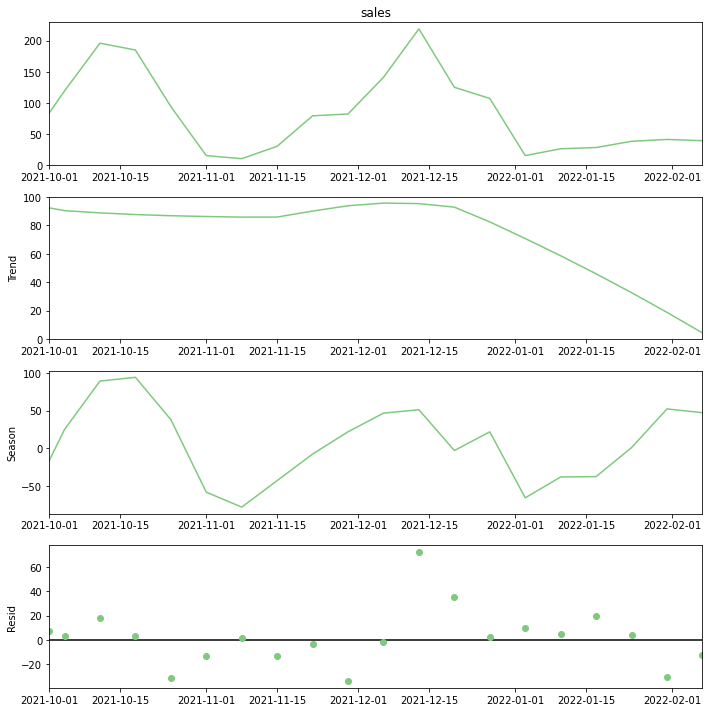

In [ ]:
res = STL(bdf['sales'], period=7).fit()
res.plot()

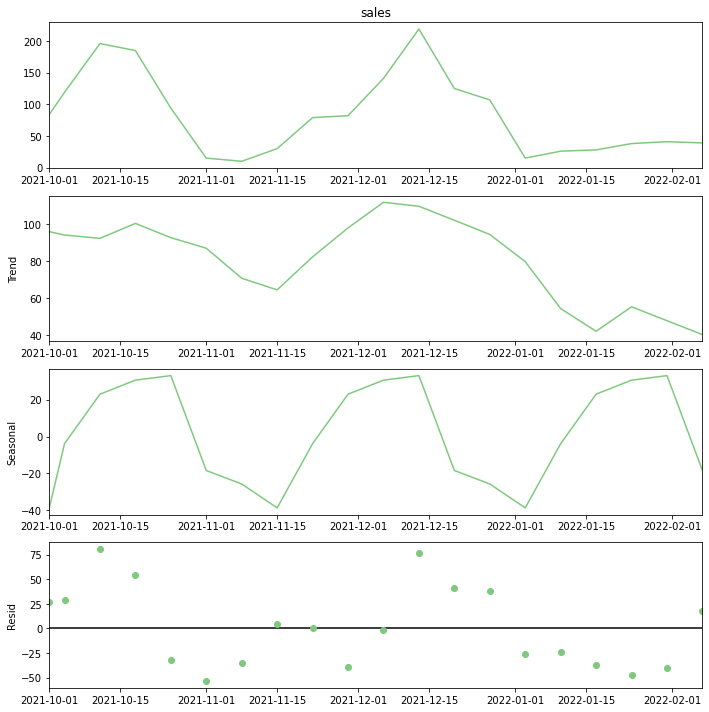

In [ ]:
# Additive Decomposition
result_add = seasonal_decompose(bdf['sales'], model='additive', extrapolate_trend='freq', period=7)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
# result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('', fontsize=22)
plt.show()